In [199]:
import pandas as pd 
import numpy as np

In [200]:
total_summer_rain = {}

In [201]:
with open('C:/Users/buckl/dev/Anna-BT-Project-Data-Analysis/bt/oak_ash/oak and ash rain.csv',encoding='utf-8-sig') as file:
    data = file.read().splitlines()
    header = data[0].split(',,')
    rain_data = data[1:]
    
    
    for i,year in enumerate(header):
        
        months_rain = 0
        x = (i*2)+1
        for j in range(3):
            months_rain+=float(rain_data[j].split(',')[x])
        total_summer_rain[year] = months_rain




In [202]:
total_summer_rain = pd.Series(total_summer_rain)
total_summer_rain = total_summer_rain.reset_index()
total_summer_rain.columns = ['Year','Rainfall']

In [203]:
total_summer_rain['Year'] = total_summer_rain['Year'].astype(int)

In [204]:
oak_ash = pd.read_csv('C:/Users/buckl/dev/Anna-BT-Project-Data-Analysis/bt/oak_ash/Oak and Ash.csv')
oak_ash

,Species Name,Speices Latin Name,Event Name,Obs Date,Obs Year,Obs Day,Recorded All Season,Amount of Fruit,When Visited,Latitude,Longitude
0,Oak (pedunculate),Quercus robur,First leaf,-53575,1753,114,NaN,NaN,NaN,52.773439,1.252656
1,Ash,Fraxinus excelsior,First leaf,-53558,1753,131,NaN,NaN,NaN,52.773439,1.252656
2,Oak (pedunculate),Quercus robur,First leaf,-53193,1754,131,NaN,NaN,NaN,52.773439,1.252656
3,Oak (pedunculate),Quercus robur,First leaf,-52851,1755,108,NaN,NaN,NaN,52.773439,1.252656
4,Ash,Fraxinus excelsior,First leaf,-52847,1755,112,NaN,NaN,NaN,52.773439,1.252656
...,...,...,...,...,...,...,...,...,...,...,...
63686,Oak (pedunculate),Quercus robur,Budburst,45414,2024,123,NaN,NaN,7 days prior,54.131538,-0.808482
63687,Ash,Fraxinus excelsior,First leaf,45427,2024,136,NaN,NaN,7 days prior,54.534368,-1.023367
63688,Ash,Fraxinus excelsior,Budburst,45424,2024,133,NaN,NaN,7 days prior,55.186878,-3.754208
63689,Oak (pedunculate),Quercus robur,Budburst,45418,2024,127,NaN,NaN,7 days prior,53.379276,-1.537916


In [205]:
oak_ash = oak_ash[oak_ash['Obs Year']>=1970]

In [206]:
oak_ash

,Species Name,Speices Latin Name,Event Name,Obs Date,Obs Year,Obs Day,Recorded All Season,Amount of Fruit,When Visited,Latitude,Longitude
2617,Oak (pedunculate),Quercus robur,First leaf,25694,1970,126,NaN,NaN,NaN,51.312405,-0.302607
2618,Ash,Fraxinus excelsior,First leaf,25699,1970,131,NaN,NaN,NaN,51.312405,-0.302607
2619,Oak (pedunculate),Quercus robur,First leaf,26046,1971,113,NaN,NaN,NaN,51.312405,-0.302607
2620,Oak (pedunculate),Quercus robur,First leaf,26393,1972,95,NaN,NaN,NaN,51.312405,-0.302607
2621,Ash,Fraxinus excelsior,First leaf,26443,1972,145,NaN,NaN,NaN,54.013352,-1.935841
...,...,...,...,...,...,...,...,...,...,...,...
63686,Oak (pedunculate),Quercus robur,Budburst,45414,2024,123,NaN,NaN,7 days prior,54.131538,-0.808482
63687,Ash,Fraxinus excelsior,First leaf,45427,2024,136,NaN,NaN,7 days prior,54.534368,-1.023367
63688,Ash,Fraxinus excelsior,Budburst,45424,2024,133,NaN,NaN,7 days prior,55.186878,-3.754208
63689,Oak (pedunculate),Quercus robur,Budburst,45418,2024,127,NaN,NaN,7 days prior,53.379276,-1.537916


In [207]:
oak_ash = oak_ash[oak_ash['Event Name'] == 'First leaf']

In [208]:
earliest_per_year = (
    oak_ash.groupby(['Obs Year', 'Species Name'], as_index=False)
    .agg({'Obs Day': 'min'})
)

In [209]:
earliest_per_year

,Obs Year,Species Name,Obs Day
0,1970,Ash,131
1,1970,Oak (pedunculate),126
2,1971,Oak (pedunculate),113
3,1972,Ash,145
4,1972,Oak (pedunculate),95
...,...,...,...
103,2022,Oak (pedunculate),82
104,2023,Ash,100
105,2023,Oak (pedunculate),94
106,2024,Ash,92


In [210]:
pivot_table = earliest_per_year.pivot(index='Obs Year', columns='Species Name', values='Obs Day')
pivot_table

Species Name,Ash,Oak (pedunculate)
Obs Year,,
1970,131.0,126.0
1971,NaN,113.0
1972,145.0,95.0
1973,122.0,115.0
1974,132.0,105.0
1975,121.0,111.0
1976,126.0,NaN
1977,126.0,121.0
1978,130.0,120.0


In [211]:
def determine_first(row):
    if row['Ash'] < row['Oak (pedunculate)']:
        return 'Ash'
    elif row['Ash'] > row['Oak (pedunculate)']:
        return 'Oak'
    else:
        return 'Tie'

pivot_table['First Leaf Species'] = pivot_table.apply(determine_first, axis=1)


In [212]:
first_leaf_species = pivot_table['First Leaf Species']
first_leaf_species

Obs Year
1970    Oak
1971    Tie
1972    Oak
1973    Oak
1974    Oak
1975    Oak
1976    Tie
1977    Oak
1978    Oak
1979    Oak
1980    Oak
1981    Oak
1982    Oak
1983    Oak
1984    Oak
1985    Oak
1986    Tie
1987    Oak
1988    Oak
1989    Oak
1990    Oak
1991    Oak
1992    Oak
1993    Oak
1994    Ash
1995    Oak
1996    Oak
1997    Oak
1998    Oak
1999    Ash
2000    Ash
2001    Ash
2002    Oak
2003    Oak
2004    Ash
2005    Ash
2006    Tie
2007    Oak
2008    Oak
2009    Oak
2010    Oak
2011    Oak
2012    Ash
2013    Oak
2014    Ash
2015    Oak
2016    Oak
2017    Tie
2018    Oak
2019    Oak
2020    Oak
2021    Ash
2022    Oak
2023    Oak
2024    Oak
Name: First Leaf Species, dtype: object

In [213]:
first_leaf_species.value_counts()

Oak    41
Ash     9
Tie     5
Name: First Leaf Species, dtype: int64

In [214]:
comparison_df = pd.DataFrame({
    'Year': first_leaf_species.index, 
    'First Leaf Species': first_leaf_species.values
}).merge(total_summer_rain, left_on='Year', right_on='Year')

print(comparison_df.head())

   Year First Leaf Species  Rainfall
0  1970                Oak     168.1
1  1971                Tie     201.5
2  1972                Oak     123.7
3  1973                Oak     201.9
4  1974                Oak     169.4


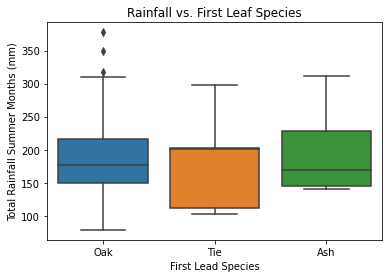

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize the relationship
sns.boxplot(data=comparison_df, x='First Leaf Species', y='Rainfall')
plt.title('Rainfall vs. First Leaf Species')
plt.xlabel("First Lead Species")
plt.ylabel("Total Rainfall Summer Months (mm)")
plt.show()


In [216]:
from scipy.stats import f_oneway, kruskal

# Group data by 'First Leaf Species'
groups = [group['Rainfall'].values for _, group in comparison_df.groupby('First Leaf Species')]

# ANOVA
anova_result = f_oneway(*groups)
print(f"ANOVA p-value: {anova_result.pvalue}")

# Kruskal-Wallis Test
kruskal_result = kruskal(*groups)
print(f"Kruskal-Wallis p-value: {kruskal_result.pvalue}")


ANOVA p-value: 0.9730787952240415
Kruskal-Wallis p-value: 0.9790689317875441


In [217]:
# Discretize rainfall into categories
comparison_df['Rainfall Category'] = pd.qcut(comparison_df['Rainfall'], q=3, labels=['Low', 'Medium', 'High'])

# Create a contingency table
contingency_table = pd.crosstab(comparison_df['First Leaf Species'], comparison_df['Rainfall Category'])

# Perform chi-square test
from scipy.stats import chi2_contingency

chi2_result = chi2_contingency(contingency_table)
print(f"Chi-Square p-value: {chi2_result[1]}")


Chi-Square p-value: 0.8978756985391695
